In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Construction Apprentice Program Sponsors & Signatories as of Oct 2024.xlsx - All Program Participants (2).csv')

# Standardizing column names: converting to lowercase and replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Handling missing values
df = df.fillna("Unknown")  # Replace missing values with 'Unknown'

# Standardizing text columns: trimming spaces, converting to uppercase
text_columns = ["sponsor", "trade", "signatory_name", "signatory_address", "city", "state", "source"]
for col in text_columns:
    df[col] = df[col].str.strip().str.upper()

# Standardizing Zip Code format: ensuring it's a string
df["zip_code"] = df["zip_code"].astype(str).str.zfill(5)

# Standardizing date format
df["date_signatory_added"] = pd.to_datetime(df["date_signatory_added"], errors="coerce")


In [3]:
df.head()

,sponsor,trade,signatory_name,signatory_address,city,state,zip_code,date_signatory_added,source
0,ASSOCIATED BUILDERS AND CONTRACTORS EMPIRE STATE,CARPENTER,ADW CONSTRUCTION GROUP CORPORATION,46 CHESHIRE RD,BETHPAGE,NY,11714,2022-05-27,GROUP SIGNATORY FOIL NYSDOL OCT 2024
1,ASSOCIATED BUILDERS AND CONTRACTORS EMPIRE STATE,CARPENTER,"AMBUILD SUPPLY, LLC.",6605 PITTSFORD PALMYRA ROAD,FAIRPORT,NY,14450,2021-03-17,GROUP SIGNATORY FOIL NYSDOL OCT 2024
2,ASSOCIATED BUILDERS AND CONTRACTORS EMPIRE STATE,CARPENTER,"AMBUILD SUPPLY, LLC.",6605 PITTSFORD PALMYRA ROAD,FAIRPORT,NY,14450,2024-01-01,GROUP SIGNATORY FOIL NYSDOL OCT 2024
3,ASSOCIATED BUILDERS AND CONTRACTORS EMPIRE STATE,CARPENTER,ASSOCIATED BUILDERS AND CONTRACTORS EMPIRE STATE,6369 COLLAMER DRIVE,EAST SYRACUSE,NY,13057,2021-07-08,ACTIVE SPONSORS LIST NYSDOL JAN 2025
4,ASSOCIATED BUILDERS AND CONTRACTORS EMPIRE STATE,CARPENTER,CMI INSTALLATIONS LLC.,718 COUNTY HIGHWAY 126,AMSTERDAM,NY,12010,2024-03-10,GROUP SIGNATORY FOIL NYSDOL OCT 2024


In [ ]:
# Save cleaned data to a new file
cleaned_file_path = "../data/processed/cleaned_construction_apprentice.csv"
df.to_csv(cleaned_file_path, index=False)

# Print path to saved file
print(f"Cleaned data saved at: {cleaned_file_path}")

Cleaned data saved at: cleaned_construction_apprentice.csv


In [6]:
df = df.drop_duplicates()


In [7]:
print(df.describe(include="all"))


                                               sponsor      trade  \
count                                            32348      32348   
unique                                             415         67   
top     NORTH ATLANTIC STATES CARPENTERS TRAINING FUND  CARPENTER   
freq                                             10910       3702   
mean                                               NaN        NaN   
min                                                NaN        NaN   
25%                                                NaN        NaN   
50%                                                NaN        NaN   
75%                                                NaN        NaN   
max                                                NaN        NaN   

                      signatory_name signatory_address      city  state  \
count                          32348             32348     32348  32348   
unique                         14159             12369      2454     61   
top     C&S TEC

In [8]:
print(df["trade"].unique())
print(df["state"].value_counts())


['CARPENTER' 'DRY WALL TAPER (FINISHER)' 'ELECTRICIAN'
 'IRON WORKER (OUTSIDE)' 'OPTG. ENGINEER (HEAVY EQUIPMENT)'
 'PAINTER AND DECORATOR' 'PLUMBER' 'ROOFER' 'SHEET METAL WORKER'
 'SKILLED CONSTRUCTION CRAFT LABORER' 'CEMENT FINISHER OR CEMENT MASON'
 'CARPENTER (HEAVY-HIGHWAY)' 'OPTG. ENGINEER (GRADE AND PAVING EQUIP)'
 'WELDER (INDUSTRIAL)' 'STEAMFITTER'
 'HEATING, VENTILATION AND AIR CONDITIONING MECHANIC'
 'PLUMBER AND PIPEFITTER' 'INSULATION AND ASBESTOS WORKER'
 'SPRINKLER FITTER' 'BRICKLAYER, MASON' 'POINTER, CAULKER AND CLEANER'
 'TILE SETTER (4 YEAR)' 'TILE, MARBLE AND TERRAZZO FINISHER'
 'PLUMBER AND STEAMFITTER' 'BOILERMAKER (CONSTRUCTION)' 'PLASTERER'
 'STONE MASON' 'BRICKLAYER MASON AND PLASTERER' 'TILE SETTER (3 YEAR)'
 'HEATING, VENTILATION, AND AIR CONDITIONING MECHANIC' 'CABINETMAKER'
 'CARPENTER(PILEDRIVER/DOCKBUILDER'
 'LINOLEUM, RESILIENT TILE AND CARPET LAYER' 'MILLWRIGHT' 'PIPEFITTER'
 'ELECTRICAL (OUTSIDE) LINE WORKER' 'STATIONARY ENGINEER'
 'ELECTRICIAN (HOUSEW

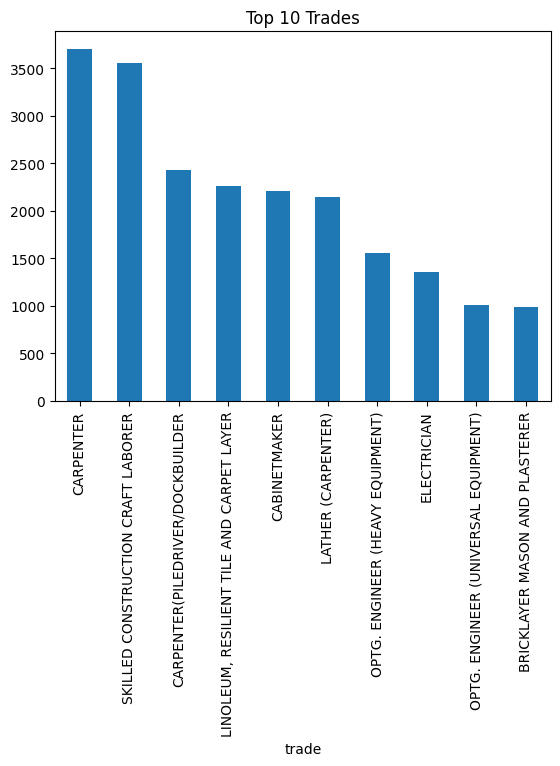

In [9]:
import matplotlib.pyplot as plt

df["trade"].value_counts().head(10).plot(kind="bar", title="Top 10 Trades")
plt.show()


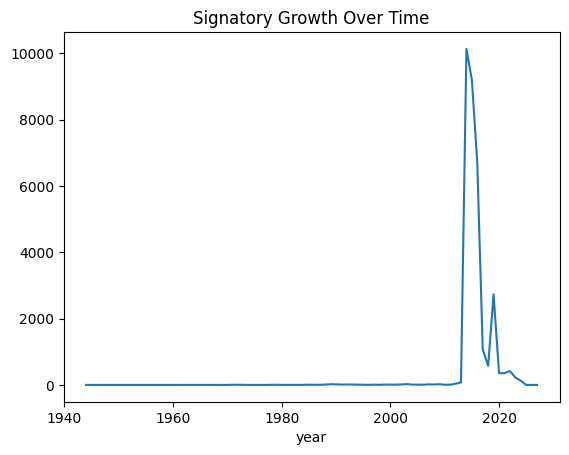

In [13]:
df["year"] = df["date_signatory_added"].dt.year
df["year"].value_counts().sort_index().plot(kind="line", title="Signatory Growth Over Time")
plt.show()
